## Objetivo
Este proyecto tiene como proposito desarrollar una aplicación que, al ingresar el nombre de un jugador de fútbol, pueda identificar a otros jugadores con habilidades y rendimiento similares. Para lograr esto, se utilizará un modelo de clasificación basado en el algoritmo de los k-vecinos más cercanos (k-NN).

#### Después de extraer los datos mediante web scraping, el siguiente paso es evaluar y preparar los datos para el modelado. Aquí están los pasos que debes seguir:

* Limpieza de datos: Este paso implica tratar con valores perdidos y eliminar cualquier ruido o inconsistencia en los datos.

* Análisis exploratorio de datos (EDA): Este paso nos ayudará a entender mejor los datos, visualizar los datos para identificar patrones, tendencias y relaciones entre las variables.

* Preprocesamiento de datos: En este paso, vamos a estandarizar los datos para que todas las características tengan la misma escala. Esto es especialmente importante para el algoritmo k-NN, ya que se basa en las distancias entre los puntos de datos.

* Selección de características: No todas las características pueden ser relevantes para cada posición, por ende se deben seleccionar las mas importantes para cada posición.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
data = pd.read_csv(r"C:\Users\Carlo\Desktop\Todo el proyecto\Proyecto\DATA TOTAL\Data Completa.csv")

In [11]:
data.shape

(23584, 36)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23584 entries, 0 to 23583
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Name                            23584 non-null  object 
 1   Goals                           23584 non-null  float64
 2   Big chances missed              23584 non-null  float64
 3   Successful dribbles %           23584 non-null  float64
 4   Total shots                     23584 non-null  float64
 5   Headed goals                    23584 non-null  float64
 6   Set piece conversion %          23584 non-null  float64
 7   Tackles                         23584 non-null  float64
 8   Interceptions                   23584 non-null  float64
 9   Penalty committed               23584 non-null  float64
 10  Clearances                      23584 non-null  float64
 11  Errors lead to goal             23584 non-null  float64
 12  Dribbled past                   

In [13]:
data.duplicated().sum()

0

In [14]:
data.describe()

,Goals,Big chances missed,Successful dribbles %,Total shots,Headed goals,Set piece conversion %,Tackles,Interceptions,Penalty committed,Clearances,...,Yellow cards,Red cards,Aerial duels won %,Total duels won %,Was fouled,Fouls,Appearances,Age Range,Position,Level
count,23584.000000,23584.000000,23584.000000,23584.00000,23584.000000,23584.000000,23584.000000,23584.000000,23584.000000,23584.000000,...,23584.000000,23584.000000,23584.000000,23584.000000,23584.000000,23584.000000,23584.000000,23584.000000,23584.000000,23584.000000
mean,0.064389,0.055199,43.746533,0.67271,0.011065,0.045851,0.896593,0.560246,0.010655,1.017328,...,0.125792,0.008399,44.211052,49.441537,0.655818,0.721851,17.319751,1.830351,2.760940,2.862916
std,0.112150,0.103618,29.907794,0.65181,0.034219,0.939980,0.708446,0.555008,0.043239,1.183649,...,0.137235,0.039819,25.487175,18.128512,0.542692,0.508873,10.952980,0.750475,0.880181,0.896544
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,23.530000,0.20000,0.000000,0.000000,0.330000,0.090000,0.000000,0.200000,...,0.000000,0.000000,30.000000,41.900000,0.250000,0.360000,8.000000,1.000000,2.000000,2.000000
50%,0.000000,0.000000,48.280000,0.50000,0.000000,0.000000,0.820000,0.410000,0.000000,0.590000,...,0.100000,0.000000,45.830000,50.000000,0.560000,0.690000,17.000000,2.000000,3.000000,3.000000
75%,0.090000,0.070000,61.900000,1.00000,0.000000,0.000000,1.320000,0.920000,0.000000,1.350000,...,0.190000,0.000000,59.090000,57.140000,0.960000,1.000000,27.000000,2.000000,3.000000,3.000000
max,1.500000,2.000000,100.000000,7.00000,1.000000,100.000000,10.000000,7.000000,1.000000,12.000000,...,2.000000,1.000000,100.000000,100.000000,5.000000,7.000000,46.000000,3.000000,4.000000,4.000000


In [15]:
data.isnull().sum().value_counts()

0    36
dtype: int64

#### Primeras conclusiones: 

* No existen valores faltantes.
* No existen duplicados.
* Contamos con 36 variables de las cuales solo dos no son numericas.


In [16]:
# Crea una copia del DataFrame excluyendo las columnas 'Name' y 'League'
data_sin_nombre_liga = data.drop(['Name', 'League'], axis=1)

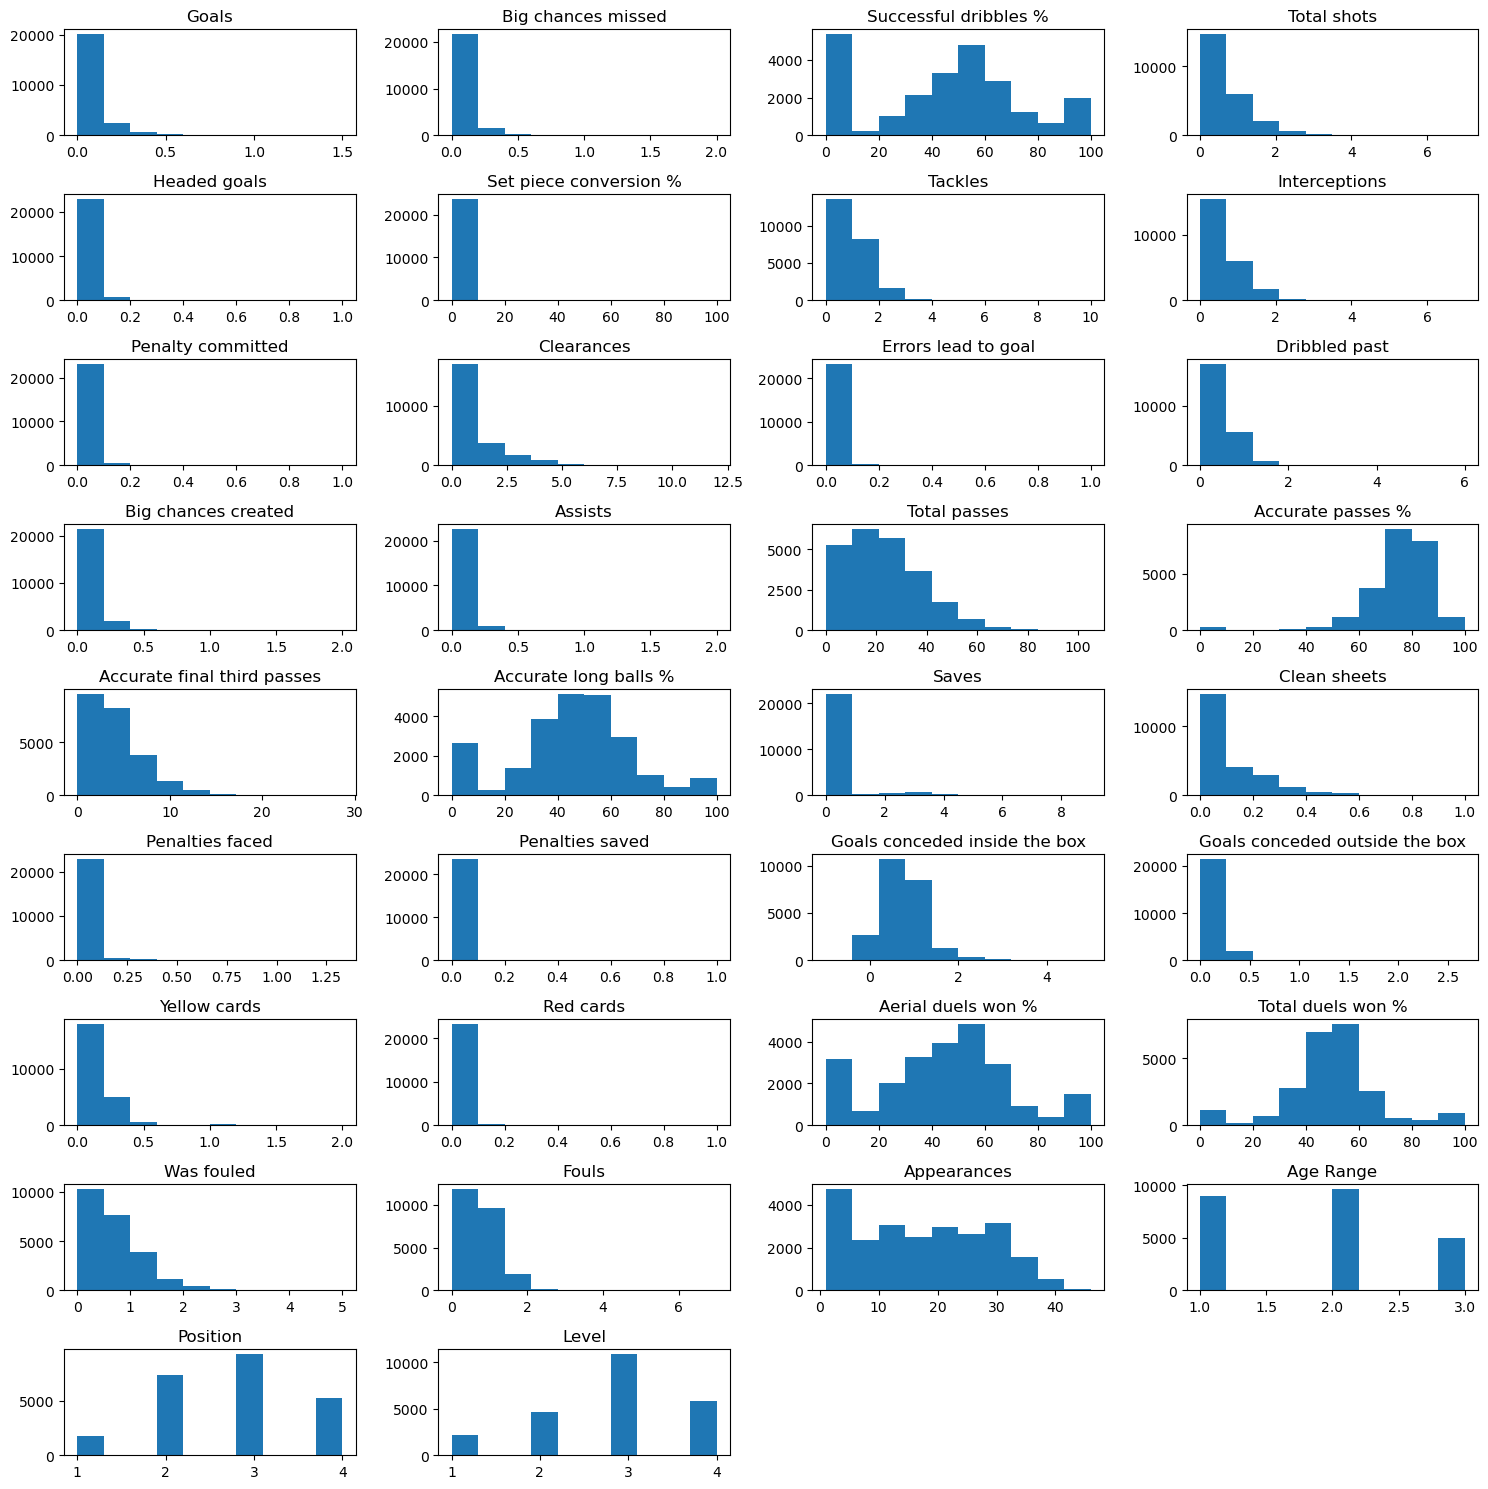

In [17]:
import numpy as np

columnas = data_sin_nombre_liga.columns
n = 4  # Número de gráficos por fila
fig, axs = plt.subplots((len(columnas) + n - 1) // n, n, figsize=(15, 15))

for i, columna in enumerate(columnas):
    ax = axs[i // n, i % n]
    ax.hist(data_sin_nombre_liga[columna])
    ax.set_title(columna)

# Elimina los ejes vacíos
for i in range(len(columnas), n * ((len(columnas) + n - 1) // n)):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()


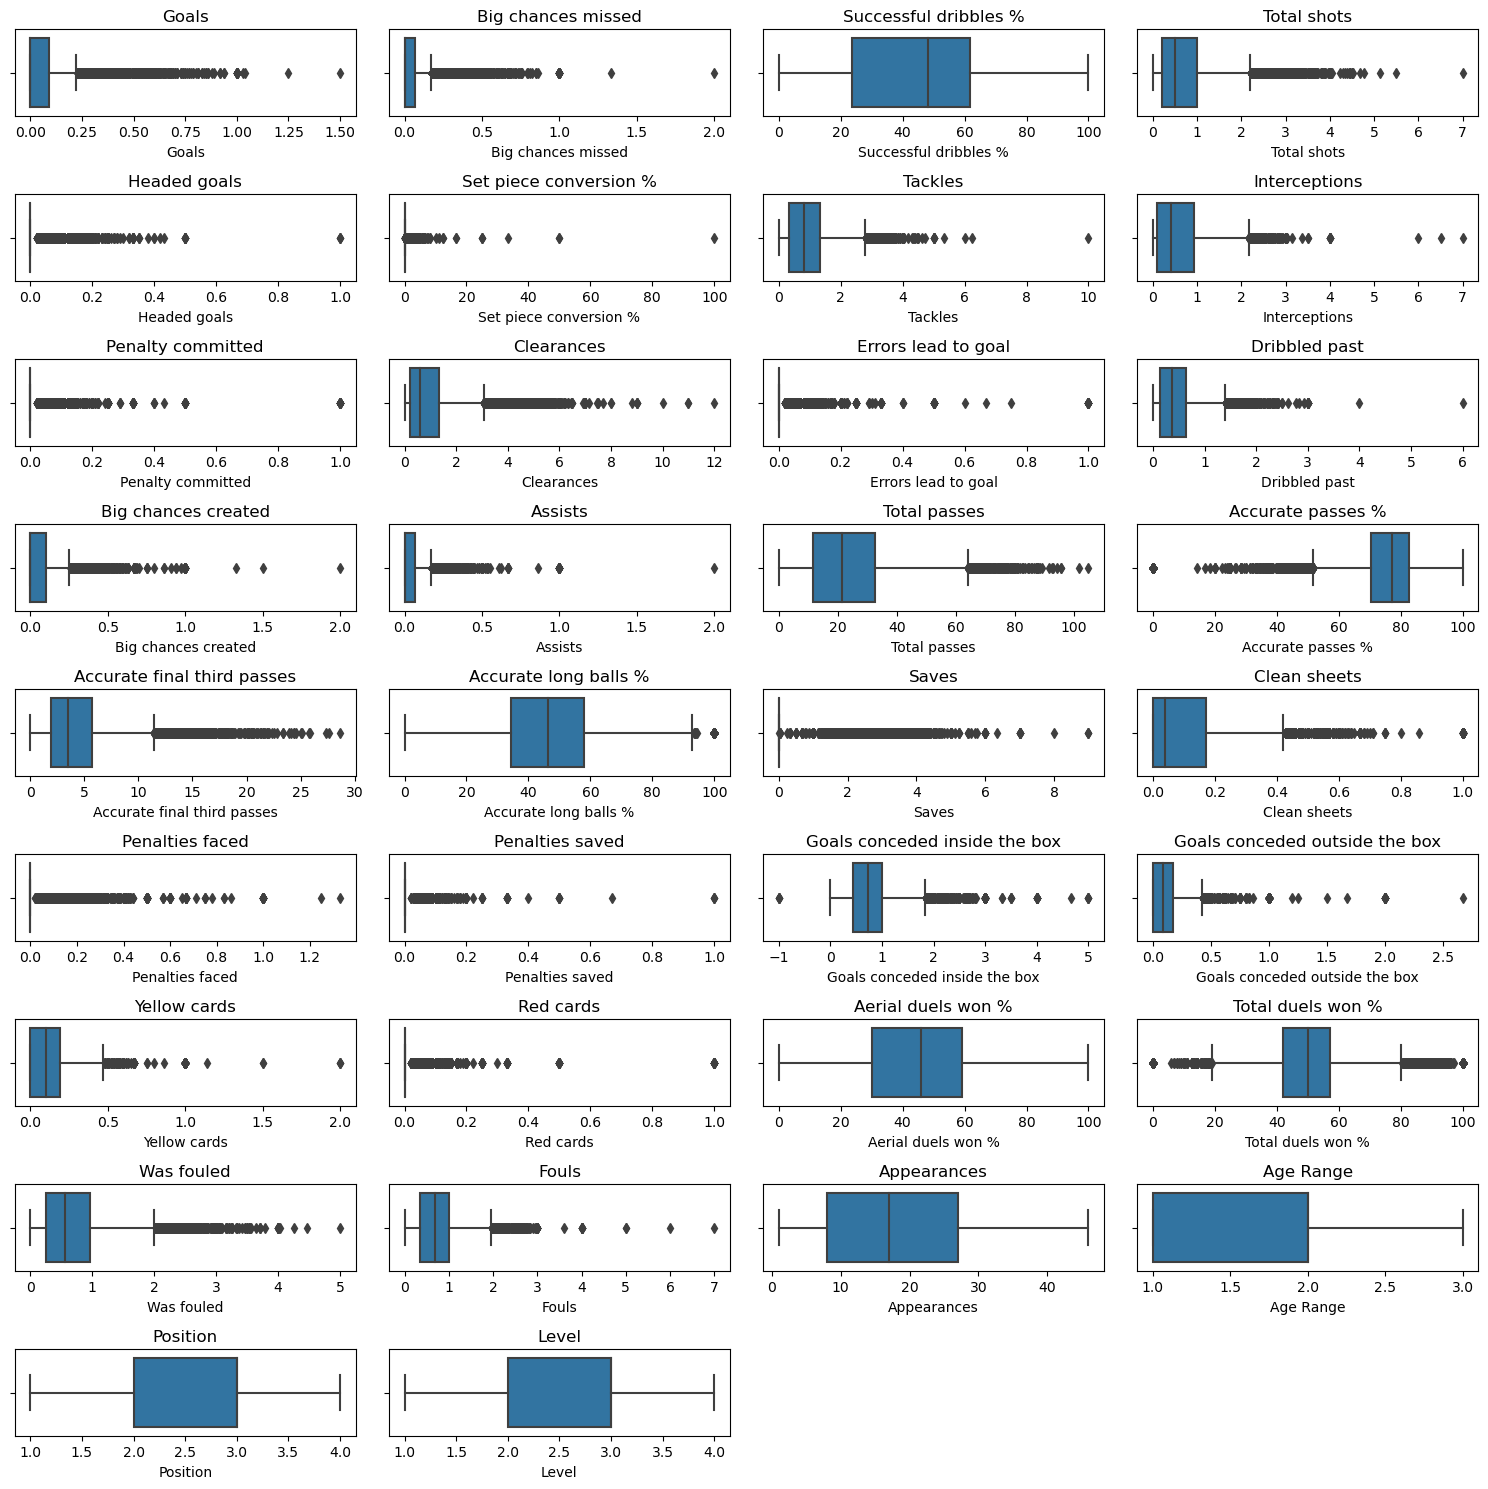

In [18]:
import numpy as np
import seaborn as sns

columnas = data_sin_nombre_liga.columns
n = 4  # Número de gráficos por fila
fig, axs = plt.subplots((len(columnas) + n - 1) // n, n, figsize=(15, 15))

for i, columna in enumerate(columnas):
    ax = axs[i // n, i % n]
    sns.boxplot(x=data_sin_nombre_liga[columna], ax=ax)
    ax.set_title(columna)

# Elimina los ejes vacíos
for i in range(len(columnas), n * ((len(columnas) + n - 1) // n)):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()


# Observaciones

Nuestro análisis reveló varias características importantes de los datos:

- Muchas variables exhiben una distribución sesgada. Para optimizar la precisión del modelo, se aconseja la estandarización de estos valores.
- El rango de edad demuestra una concentración predominante en las dos primeras categorías, correspondientes a los jugadores más jóvenes y de mediana edad. Los jugadores de mayor edad están menos representados.
- Las posiciones de delantero y mediocampista son las más frecuentes, seguidas por los defensas. Los porteros son menos comunes, lo cual es coherente con la estructura típica de un equipo de fútbol.

# Consideraciones
- Durante la extracción de datos, se puntuaron numerosas variables por partidos jugados. Este enfoque se adoptó para garantizar la transparencia, dado que el conjunto de datos abarca ligas con diferentes números de partidos. Este factor es importante al interpretar las habilidades que se presentan “Por Partido”.

- Se contempló la aplicación del método PCA para el análisis de datos. Sin embargo, dado que nuestro objetivo requiere una interpretación sencilla de las variables, el PCA, que transforma las variables en componentes principales menos interpretables, no se consideró adecuado para este análisis.

# Conclusiones y Recomendaciones
En base a nuestros hallazgos, recomendamos lo siguiente:

- Los datos deben ser segmentados por posiciones. Esto permitirá entrenar cuatro modelos distintos, optimizando así el rendimiento del modelo K-Nearest Neighbors (KNN). De esta manera, el modelo podrá encontrar más similitudes y garantizar que no se produzcan cruces de datos, ya que hay posiciones que comparten habilidades importantes, como es el caso de los delanteros y los mediocampistas.

- Es crucial seleccionar las columnas importantes para cada posición, con el objetivo de que el modelo se centre en las habilidades verdaderamente relevantes para cada posición. Esta es la información que deseamos proporcionar al usuario final, facilitando así su interpretación y efectividad.

#### Resumen : 

#### Este informe presenta un análisis detallado de un conjunto de datos de jugadores de fútbol, con el objetivo de desarrollar un modelo que pueda encontrar jugadores con habilidades similares. Nuestros hallazgos indican que la segmentación de los datos por posición y la selección cuidadosa de las características relevantes para cada posición pueden mejorar significativamente el rendimiento del modelo.